# Coding exercises
Exercises 1-3 are thought exercises that don't require coding. If you need a Python crash-course/refresher, work through the [`python_101.ipynb`](./python_101.ipynb) notebook in chapter 1.

## Exercise 4: Generate the data by running this cell
This will give you a list of numbers to work with in the remaining exercises.

In [1]:
import random

random.seed(0)
salaries = [round(random.random()*1000000, -3) for _ in range(100)]

## Exercise 5: Calculating statistics and verifying
### mean

In [2]:
import numpy as np
mean = np.mean(salaries)
mean

585690.0

In [25]:
# another method
mean = sum(salaries) / len(salaries)
mean

585690.0

### median

In [3]:
median = np.median(salaries)
median

589000.0

In [26]:
# another way (complicated)
import math

def find_median(x):
    x.sort()
    midpoint = (len(x) + 1) / 2 - 1 # subtract 1 cause index start is 0
    if len(x) % 2:
        return x[int(midpoint)]
    else:
        return (x[math.floor(midpoint)] + x[math.ceil(midpoint)]) / 2
        

In [27]:
find_median(salaries)

589000.0

### mode

In [4]:
import pandas as pd
from scipy import stats

In [5]:
mode = stats.mode(salaries)
mode

ModeResult(mode=477000.0, count=3)

In [24]:
# another way to find it
from collections import Counter

mode = Counter(salaries).most_common(1)[0][0]
mode

477000.0

### sample variance
Remember to use Bessel's correction.

In [36]:
from statistics import variance
sample_variance = variance(salaries)
sample_variance

70664054444.44444

In [31]:
# another crazy way
sample_variance = sum([(x - sum(salaries) / len(salaries))**2 for x in salaries]) / (len(salaries) - 1) 
sample_variance

70664054444.44444

### sample standard deviation
Remember to use Bessel's correction.

In [7]:
sample_std = np.std(salaries)
sample_std

264494.6386980273

In [37]:
# another way
from statistics import stdev
std = stdev(salaries)
std

265827.11382484

In [38]:
# one more!
std = math.sqrt(sum([(x - sum(salaries) / len(salaries))**2 for x in salaries]) / (len(salaries) - 1))
std

265827.11382484

## Exercise 6: Calculating more statistics
### range

In [8]:
range = np.max(salaries) - np.min(salaries)
range

995000.0

### coefficient of variation
Make sure to use the sample standard deviation.

In [39]:
cv = std / mean
cv

0.45386998894439035

In [40]:
# another method
from statistics import mean, stdev

cv = stdev(salaries) / mean(salaries)
cv

0.45386998894439035

### interquartile range

In [10]:
import seaborn as sns

<Axes: >

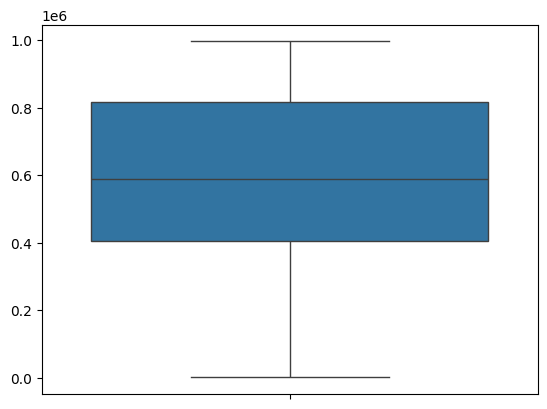

In [11]:
sns.boxplot(salaries)

In [12]:
iqr = stats.iqr(salaries)
iqr

413250.0

In [46]:
Q1 = np.percentile(salaries, 25)
Q3 = np.percentile(salaries, 75)
IQR = Q3 - Q1
IQR

413250.0

In [41]:
# another way
def quantile(x, pct):
    x.sort()
    index = (len(x) + 1) * pct - 1
    if len(x) % 2:
        # odd, so grab the value at index
        return x[int(index)]
    else:
        return (x[math.floor(index)] + x[math.ceil(index)]) / 2

In [48]:
Q3, Q1 = quantile(salaries, 0.75), quantile(salaries, 0.25)
IQR = Q3 - Q1
IQR

417500.0

### quartile coefficent of dispersion

In [49]:
QCD = IQR / (Q3 + Q1)
QCD

0.3417928776094965

## Exercise 7: Scaling data
### min-max scaling

In [15]:
import matplotlib.pyplot as plt

(array([ 5.,  5.,  8.,  6., 13., 15.,  9.,  9., 14., 16.]),
 array([  1000., 100500., 200000., 299500., 399000., 498500., 598000.,
        697500., 797000., 896500., 996000.]),
 <BarContainer object of 10 artists>)

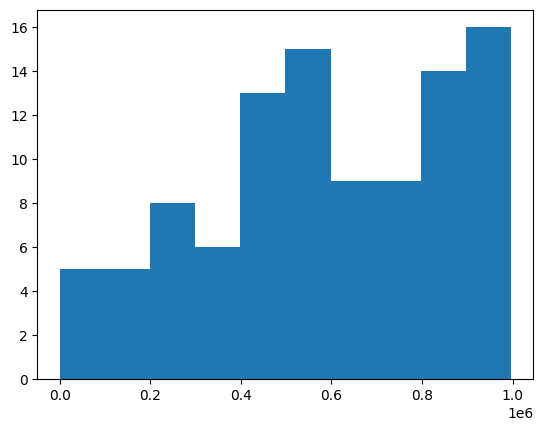

In [16]:
plt.hist(salaries)

In [56]:
min_salary, max_salary = np.min(salaries), np.max(salaries)
salary_range = max_salary - min_salary

min_max_scaled = [(x - min_salary) / salary_range for x in salaries]
min_max_scaled[:5]

[0.0,
 0.01306532663316583,
 0.07939698492462312,
 0.0814070351758794,
 0.08944723618090453]

(array([ 5.,  5.,  8.,  6., 13., 15.,  9.,  9., 14., 16.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

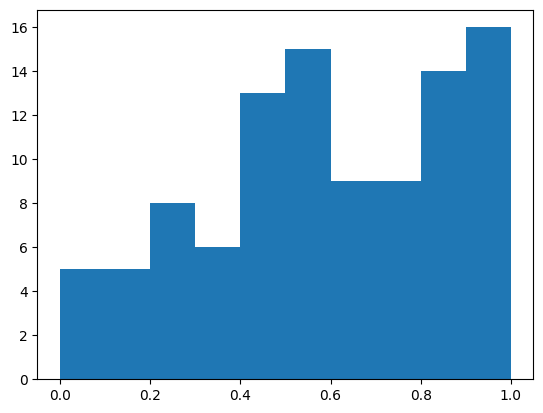

In [57]:
plt.hist(min_max_scaled)

### standardizing

In [53]:
mean_salary, std_salary = mean(salaries), stdev(salaries)
standardized = [(x - mean_salary) / std_salary for x in salaries]
standardized[:5]

[-2.199512275430514,
 -2.150608309943509,
 -1.9023266390094862,
 -1.8948029520114855,
 -1.8647082040194827]

(array([ 5.,  5.,  8.,  6., 13., 15.,  9.,  9., 14., 16.]),
 array([-2.19951228, -1.82520885, -1.45090542, -1.07660199, -0.70229856,
        -0.32799513,  0.04630829,  0.42061172,  0.79491515,  1.16921858,
         1.54352201]),
 <BarContainer object of 10 artists>)

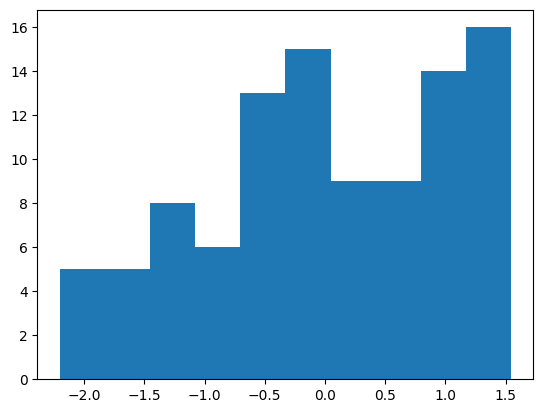

In [54]:
plt.hist(standardized)

## Exercise 8: Calculating covariance and correlation
### covariance

In [58]:
covariance = np.cov(min_max_scaled, standardized)
covariance

array([[0.07137603, 0.26716293],
       [0.26716293, 1.        ]])

our solution is 0.26716293

In [59]:
# another way
running_total = [
    (x - mean(min_max_scaled)) * (y - mean(standardized))
    for x, y in zip(min_max_scaled, standardized)
]

cov = mean(running_total)
cov

0.26449129918250414

### Pearson correlation coefficient ($\rho$)

In [61]:
corr_coef = cov / (stdev(min_max_scaled) * stdev(standardized))
corr_coef

0.9900000000000001

<hr>
<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
        <a href="./python_101.ipynb">
            <button>Python 101</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="../../solutions/ch_01/solutions.ipynb">
            <button>Solutions</button>
        </a>
        <a href="../ch_02/1-pandas_data_structures.ipynb">
            <button>Chapter 2 &#8594;</button>
        </a>
    </div>
</div>
<hr>